In [1]:
import random

In [2]:
def test(gcd, n_iter=100):
    for _ in range(n_iter):
        c = random.randint(0, 1024)
        a = c * random.randint(0, 128)
        b = c * random.randint(0, 128)
        assert gcd(a, a) == gcd(a, 0) == a
        assert gcd(b, b) == gcd(b, 0) == b
        assert gcd(a, 1) == 1
        assert gcd(b, 1) == 1
        d = gcd(a, b)
        assert a%d == b%d == 0

In [9]:
def gcd1(a, b):
    assert a >= 0 and b >= 0
    for d in reversed(range(max(a, b) + 1)):
        if d==0 or a%d == b%d == 0:
            return d

In [5]:
gcd1(8, 3)

1

In [7]:
gcd1(8, 0)

8

In [10]:
gcd1(0, 0)

0

In [11]:
test(gcd1)

In [12]:
def gcd2(a, b):
    while a and b:
        if a >= b:
            a %= b
        else:
            b %= a
    return max(a, b)

In [13]:
test(gcd2)

In [14]:
gcd2(10000000000, 10000000000)

10000000000

In [15]:
def gcd3(a, b):
    assert a >= 0 and b >= 0
    if a == 0 or b == 0:
        return max(a, b)
    elif a >= b:
        return gcd3(a%b, b)
    else:
        return gcd3(a, b%a)

In [16]:
test(gcd3)

In [17]:
def gcd4(a, b):
    assert a >= 0 and b >= 0
    if a ==0 or b == 0:
        return max(a, b)
    return gcd4(b%a, a)

In [18]:
test(gcd4)

In [42]:
def timed(f, args, n_iter=100):
    acc = float("inf")
    for i in range(n_iter):
        t0 = time.perf_counter()
        f(*args)
        t1 = time.perf_counter()
        acc = min(acc, t1 - t0)
    return acc

In [34]:
from matplotlib import pyplot as plt
import time

In [47]:
def compare(fs, args):
    xs = list(range(len(args)))
    for f in fs:
        plt.plot(xs, [timed(f, arg) for arg in args], label=f.__name__)
    plt.legend()
    plt.grid(True)

In [61]:
args1 = [(random.randint(10000000, 900000000), random.randint(100000000, 9000000000)) for i in range(300)]

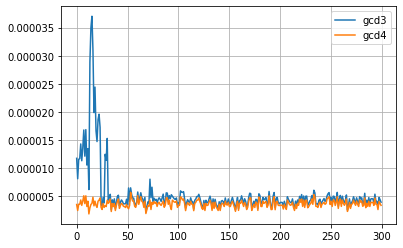

In [62]:
compare([gcd3, gcd4], args1)